# Air-Standard Brayton Cycle Example

## Imports

In [1]:
from thermostate import State, Q_, units
from thermostate.plotting import IdealGas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

---

## Definitions

In [2]:
substance = 'air'
p_1 = Q_(1.0, 'bar')
T_1 = Q_(300.0, 'K')
T_3 = Q_(1700.0, 'K')
p2_p1 = Q_(8.0, 'dimensionless')
p_low = Q_(2.0, 'dimensionless')
p_high = Q_(50.0, 'dimensionless')

---

## Problem Statement

An ideal air-standard Brayton cycle operates at steady state with compressor inlet conditions of 300.0 K and 1.0 bar and a fixed turbine inlet temperature of 1700.0 K and a compressor pressure ratio of 8.0. For the cycle,

1. determine the net work developed per unit mass flowing, in kJ/kg
2. determine the thermal efficiency
3. plot the net work developed per unit mass flowing, in kJ/kg, as a function of the compressor pressure ratio from 2.0 to 50.0
4. plot the thermal efficiency as a function of the compressor pressure ratio from 2.0 to 50.0
5. Discuss any trends you find in parts 3 and 4

---

## Solution

### 1. the net work developed per unit mass flowing

In the ideal Brayton cycle, work occurs in the isentropic compression and expansion. Therefore, the works are

$$
\begin{aligned}
\frac{\dot{W}_c}{\dot{m}} &= h_1 - h_2 & \frac{\dot{W}_t}{\dot{m}} &= h_3 - h_4
\end{aligned}
$$

First, fixing the four states

In [3]:
st_1 = State(substance, T=T_1, p=p_1)
h_1 = st_1.h.to('kJ/kg')
s_1 = st_1.s.to('kJ/(kg*K)')

s_2 = s_1
p_2 = p_1*p2_p1
st_2 = State(substance, p=p_2, s=s_2)
h_2 = st_2.h.to('kJ/kg')
T_2 = st_2.T

p_3 = p_2
st_3 = State(substance, p=p_3, T=T_3)
h_3 = st_3.h.to('kJ/kg')
s_3 = st_3.s.to('kJ/(kg*K)')

s_4 = s_3
p_4 = p_1
st_4 = State(substance, p=p_4, s=s_4)
h_4 = st_4.h.to('kJ/kg')
T_4 = st_4.T

Summarizing the states,

| State |             T             |             p             |             h             |             s             |
|-------|---------------------------|---------------------------|---------------------------|---------------------------|
|     1 | 300.00 K | 1.00 bar | 426.30 kJ/kg | 3.89 kJ/(K kg) |
|     2 | 540.13 K | 8.00 bar | 670.65 kJ/kg | 3.89 kJ/(K kg) |
|     3 | 1700.00 K | 8.00 bar | 2007.09 kJ/kg | 5.19 kJ/(K kg) |
|     4 | 1029.42 K | 1.00 bar | 1206.17 kJ/kg | 5.19 kJ/(K kg) |


p-v and T-s diagrams of the cycle

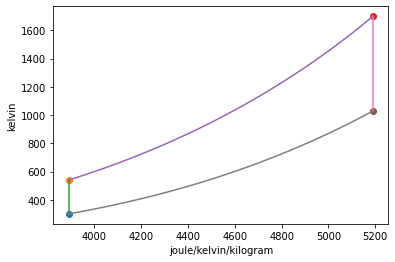

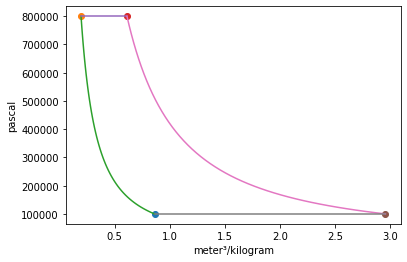

In [6]:
Brayton = IdealGas(substance, ('s', 'T'), ('v', 'p'))

Brayton.add_process(st_1, st_2, 'isentropic')
Brayton.add_process(st_2, sst_3, 'isobaric')
Brayton.add_process(st_3, st_4, 'isentropic')
Brayton.add_process(st_4, st_1, 'isobaric')

Then, the net work is calculated by

In [5]:
W_c = h_1 - h_2
W_t = h_3 - h_4
W_net = W_c + W_t

<div class="alert alert-success">

**Answer:** The works are $\dot{W}_c/\dot{m} =$ -244.35 kJ/kg, $\dot{W}_t/\dot{m} =$ 800.92 kJ/kg, and $\dot{W}_{net}/\dot{m} =$ 556.57 kJ/kg

</div>

### 2. the thermal efficiency

In [6]:
Q_23 = h_3 - h_2
eta = W_net/Q_23

<div class="alert alert-success">

**Answer:** The thermal efficiency is $\eta =$ 0.42 = 41.65%

</div>

### 3. and 4. plot the net work per unit mass flowing and thermal efficiency

In [7]:
p_range = np.linspace(p_low, p_high, 50)
eta_l = np.zeros(shape=p_range.shape) * units.dimensionless
W_net_l = np.zeros(shape=p_range.shape) * units.kJ / units.kg
for i, p_ratio in enumerate(p_range):
    s_2 = s_1
    p_2 = p_1*p_ratio
    st_2 = State(substance, p=p_2, s=s_2)
    h_2 = st_2.h.to('kJ/kg')
    T_2 = st_2.T

    p_3 = p_2
    st_3 = State(substance, p=p_3, T=T_3)
    h_3 = st_3.h.to('kJ/kg')
    s_3 = st_3.s.to('kJ/(kg*K)')

    s_4 = s_3
    p_4 = p_1
    st_4 = State(substance, p=p_4, s=s_4)
    h_4 = st_4.h.to('kJ/kg')
    T_4 = st_4.T
    
    W_c = h_1 - h_2
    W_t = h_3 - h_4
    W_net = W_c + W_t
    W_net_l[i] = W_net
    
    Q_23 = h_3 - h_2
    eta = W_net/Q_23
    eta_l[i] = eta

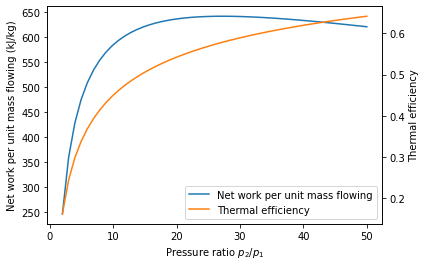

In [8]:
fig, work_ax = plt.subplots()
work_ax.plot(p_range, W_net_l, label='Net work per unit mass flowing', color='C0')
eta_ax = work_ax.twinx()
eta_ax.plot(p_range, eta_l, label='Thermal efficiency', color='C1')
work_ax.set_xlabel('Pressure ratio $p_2/p_1$')
work_ax.set_ylabel('Net work per unit mass flowing (kJ/kg)')
eta_ax.set_ylabel('Thermal efficiency')
lines, labels = work_ax.get_legend_handles_labels()
lines2, labels2 = eta_ax.get_legend_handles_labels()
work_ax.legend(lines + lines2, labels + labels2, loc='best');

We note from this graph that the thermal efficiency of the cycle increases continuously as the pressure ratio increases. However, because there is a fixed turbine inlet temperature, the work per unit mass flowing has a maximum around $p_2/p_1$ = 20.